<a href="https://colab.research.google.com/github/GA239/DS_course/blob/master/HW7/tsk1/Boston_prepr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import os
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.datasets import load_boston
data = load_boston(return_X_y=False)

In [3]:
features, prices = data.data, data.target
names = data.feature_names

In [4]:
features = pd.DataFrame(features, columns=names)
prices = pd.DataFrame(prices, columns=['MEDV'])

In [5]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# Minimum price of the data
minimum_price = np.amin(prices.values)

# Maximum price of the data
maximum_price = np.amax(prices.values)

# Mean price of the data
mean_price = np.mean(prices.values)

# Median price of the data
median_price = np.median(prices.values)

# Standard deviation of prices of the data
std_price = np.std(prices.values)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $5.0
Maximum price: $50.0
Mean price: $22.532806324110677
Median price $21.2
Standard deviation of prices: $9.188011545278203


In [7]:
features.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [8]:
prices.isnull().sum()

MEDV    0
dtype: int64

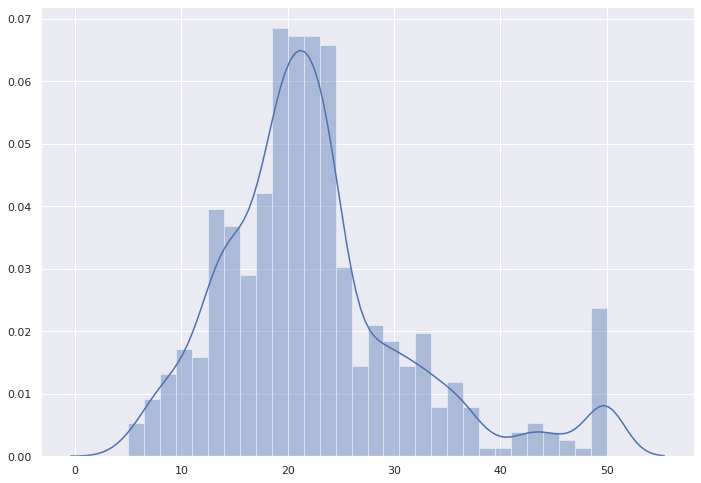

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(prices, bins=30)
plt.show()

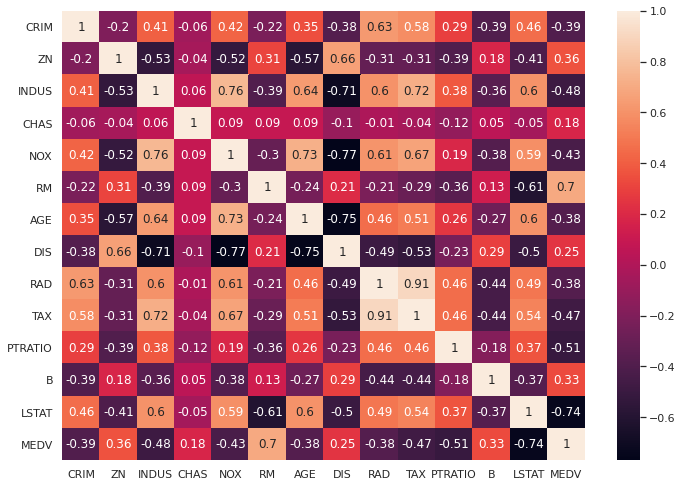

In [10]:
correlation_matrix = pd.concat([features, prices], axis=1).corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [11]:
features = features.drop(columns=['RAD', 'DIS', 'NOX', 'INDUS'])

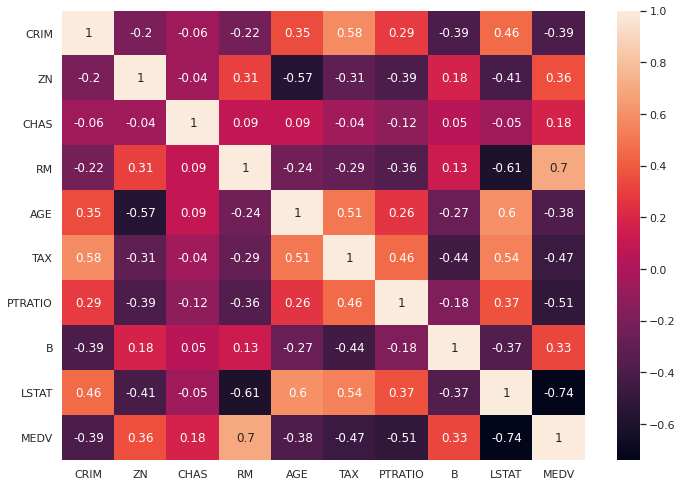

In [12]:
correlation_matrix = pd.concat([features, prices], axis=1).corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(features, prices, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 9)
(102, 9)
(404, 1)
(102, 1)


In [14]:
DRIVE = '/content/drive/My Drive'

In [15]:
X_train.to_csv(os.path.join(DRIVE, 'X_train.csv'))
X_test.to_csv(os.path.join(DRIVE, 'X_test.csv'))
Y_train.to_csv(os.path.join(DRIVE, 'Y_train.csv'))
Y_test.to_csv(os.path.join(DRIVE, 'Y_test.csv'))

In [16]:
Xtr = pd.read_csv(os.path.join(DRIVE, 'X_train.csv'), index_col=0)

In [17]:
Xtr.head()

,CRIM,ZN,CHAS,RM,AGE,TAX,PTRATIO,B,LSTAT
33,1.15172,0.0,0.0,5.701,95.0,307.0,21.0,358.77,18.35
283,0.01501,90.0,1.0,7.923,24.8,198.0,13.6,395.52,3.16
418,73.53410,0.0,0.0,5.957,100.0,666.0,20.2,16.45,20.62
502,0.04527,0.0,0.0,6.120,76.7,273.0,21.0,396.90,9.08
402,9.59571,0.0,0.0,6.404,100.0,666.0,20.2,376.11,20.31


In [18]:
all(X_train == Xtr)

True

In [19]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Activation, Dropout

In [20]:
model = Sequential()
model.add(Dense(Y_train.shape[1], input_dim=X_train.shape[1], kernel_initializer='identity', bias_initializer='zeros'))
model.add(Activation(tf.keras.activations.linear))

model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [21]:
a = model.fit(X_train.values, Y_train.values, epochs=300, verbose=1, 
              validation_data=(X_test.values, Y_test.values))

Epoch 1/300
13/13 [==============================] - 0s 11ms/step - loss: 443.0013 - root_mean_squared_error: 21.0476 - val_loss: 280.0013 - val_root_mean_squared_error: 16.7332
Epoch 2/300
13/13 [==============================] - 0s 3ms/step - loss: 292.1436 - root_mean_squared_error: 17.0922 - val_loss: 237.8381 - val_root_mean_squared_error: 15.4220
Epoch 3/300
13/13 [==============================] - 0s 3ms/step - loss: 259.8259 - root_mean_squared_error: 16.1191 - val_loss: 210.9072 - val_root_mean_squared_error: 14.5226
Epoch 4/300
13/13 [==============================] - 0s 2ms/step - loss: 235.2590 - root_mean_squared_error: 15.3382 - val_loss: 184.5188 - val_root_mean_squared_error: 13.5838
Epoch 5/300
13/13 [==============================] - 0s 2ms/step - loss: 213.8962 - root_mean_squared_error: 14.6252 - val_loss: 162.9923 - val_root_mean_squared_error: 12.7668
Epoch 6/300
13/13 [==============================] - 0s 2ms/step - loss: 195.1555 - root_mean_squared_error: 13.96

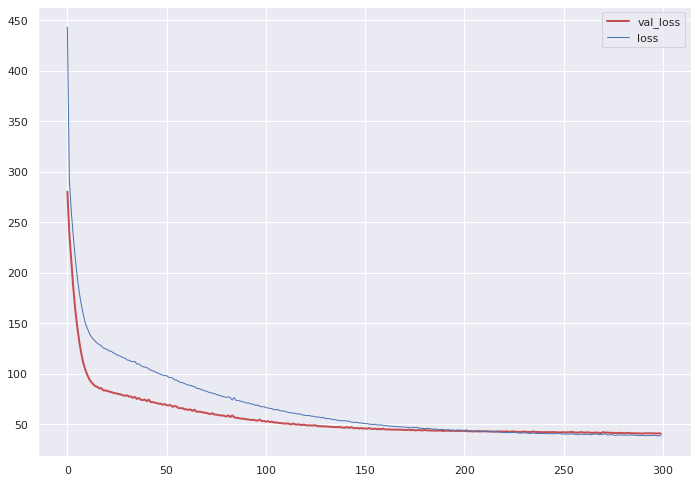

In [22]:
plt.plot(a.history['val_loss'], 'r-', lw=2, label='val_loss')
plt.plot(a.history['loss'], 'b-', lw=1, label='loss')
# plt.plot(a.history['val_root_mean_squared_error'], 'g-', lw=2, label='val_root_mean_squared_error')
# plt.plot(a.history['root_mean_squared_error'], 'c-', lw=1, label='root_mean_squared_error')
# plt.ylim(0.0, 1.0)
plt.legend()


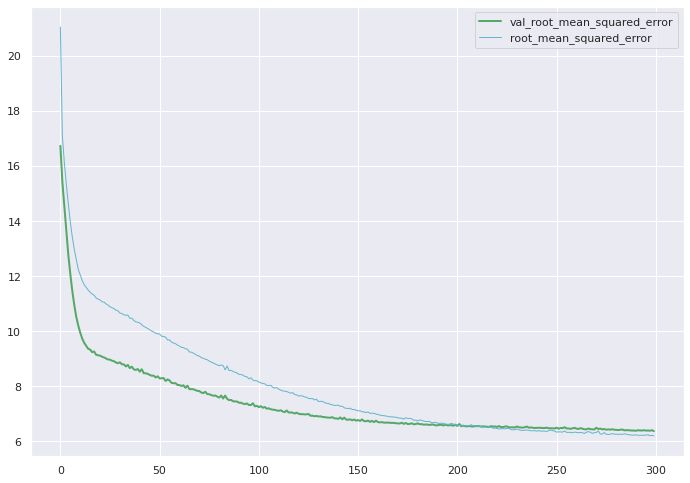

In [23]:
plt.plot(a.history['val_root_mean_squared_error'], 'g-', lw=2, label='val_root_mean_squared_error')
plt.plot(a.history['root_mean_squared_error'], 'c-', lw=1, label='root_mean_squared_error')
# plt.ylim(0.0, 1.0)
plt.legend()
